<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# RECITATION 5: Johnson Noise

<br>
<!--end-block--> 

<!--start-block-->
<hr style="height: 1px;">

## 5.0 Overview of Learning Objectives

In this recitation we will explore the following objectives:

- fill in information

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 5.1 Fitting Exercise 1

Now, we are going to see how this applies to fitting. Let us first generate some data randomly from from the model $y=2x$.

Let us suppose that we have two measurements that we need to add together, let's say we have $a_1 = 5 \pm 3$ and $a_2 = 6 \pm 4$. We want to estimate the uncertainty on 

$$f(a_1, a_2) = a_1 + a_2$$

Using our error propogation formulas, we have

$f(a_1, a_2) =  11 \pm 5$

However, we can use numpy to do this error propogation really easily. Let's see this below.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

def f(a_1, a_2):
    return a_1 + a_2

def p_histogram(samples, bins = 10, density = True):
    counts, bin_edges = np.histogram(samples, bins = bins, density = density)
    bin_centers = 0.5*(bin_edges[:-1]+bin_edges[1:])
    return counts, bin_centers

mean 11.000149896144322
std 4.975937443223568


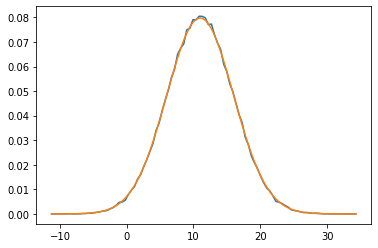

In [48]:
np.random.seed(2)
num_samples = 100000
bins = bins = 100
a1_samp = np.random.normal(loc = 5, scale = 3, size = num_samples)
a2_samp = np.random.normal(loc = 6, scale = 4, size = num_samples)

out_samp = f(a1_samp, a2_samp)

p, x = p_histogram(out_samp, bins = bins)

plt.plot(x,p)
plt.plot(x, scipy.stats.norm.pdf(x, loc =11, scale = 5))

print("mean", np.mean(out_samp))
print("std", np.std(out_samp))



<!--start-block-->
<hr style="height: 1px;">

## 5.2 Fitting Exercise 2

What about something even more complicated, like
$$g(a_1, a_2) =(\sqrt{|a_1|} + \sqrt{|a_2|})*(a_1-a_2)$$

You can do the error propogation by yourself, but it is going to be really complicated and a lot of algebra! But, with numpy, this is the exact same amount of work.

In [73]:
def g(a_1, a_2):
    term_1 = np.sqrt(np.abs(a_1))+ np.sqrt(np.abs(a_2))
    term_2 =  np.power(a_1-a_2, 1.0)
    return term_1*term_2

[  8.24097613  -4.06563722 -11.49442709 ... -25.3562765  -14.98422793
  11.06659978]
mean -5.5781881849699975
std 23.434792872522003


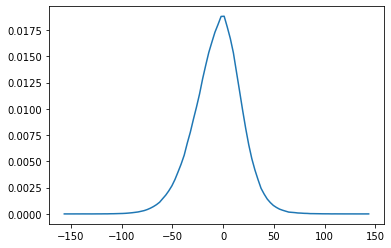

In [77]:
np.random.seed(2)
num_samples = 1000000
bins = bins = 100
a1_samp = np.random.normal(loc = 5, scale = 3, size = num_samples)
a2_samp = np.random.normal(loc = 6, scale = 4, size = num_samples)

out_samp = g(a1_samp, a2_samp)
print(out_samp)
p, x = p_histogram(out_samp, bins = bins)

plt.plot(x,p)

print("mean", np.mean(out_samp))
print("std", np.std(out_samp))

<!--start-block-->
<hr style="height: 1px;">

## 5.3 Measuring the Boltzmann Constant from Johnson Noise

Now let us use this example to do a little bit of analysis from Junior Lab to measure the Boltzmann constant. This comes from an experiment called Johnson noise, which is thermal noise across a resistor.

$$V^2 = 4 R k_B T \int_{0}^{\infty} \frac{g(f)^2}{1+ (2\pi R C f)^2}$$

We measured $g$ as a function of $f$, and we have some uncertainty on $R$, and we also have some uncertainty on $C$. How do we compute the uncertainty on this complicated quantity?

In [80]:
f = np.array([   200.,    300.,    400.,    500.,    600.,    700.,    800.,
          900.,   1000.,   1100.,   1200.,   1300.,   1400.,   1500.,
         1700.,   2000.,   3000.,   4000.,   5000.,   7000.,  10000.,
        13000.,  15000.,  17000.,  20000.,  25000.,  30000.,  35000.,
        40000.,  45000.,  50000.,  55000.,  60000.,  65000.,  70000.,
        75000.,  80000.,  85000.,  90000.,  95000., 100000.])

gain = np.array([  1.56572199,   7.56008454,  24.23507344,  58.36646477,
       119.11924863, 215.75587662, 354.79343025, 517.34083494,
       679.81395988, 805.18954729, 877.53623188, 944.14612835,
       951.12203586, 981.66551215, 976.08071562, 971.57565072,
       991.33195051, 974.54482165, 968.02100388, 970.96127868,
       972.70192708, 980.9122768 , 983.62597547, 981.85446382,
       964.75994752, 984.27991886, 959.44478862, 975.87335094,
       906.24841379, 831.8699187 , 695.5940221 , 562.69096627,
       426.50959034, 328.93671408, 248.14630158, 198.16023325,
       150.59357167, 121.00349255, 100.86777721,  79.42663031,
        63.20952534])

gain_error = np.array([5.21317443e-03, 3.11522352e-02, 1.17453781e-01, 1.54063502e-01,
       1.27335068e+00, 1.27124575e+00, 1.62862522e+00, 8.07632112e-01,
       1.39800408e+00, 1.52872753e+00, 9.26100943e-01, 2.07700290e+00,
       2.41624111e+00, 2.48737608e+00, 2.66446131e+00, 6.30956544e+00,
       2.48543922e+00, 5.85031911e+00, 5.36245736e+00, 5.03316166e+00,
       5.96042863e+00, 1.80119083e+00, 2.19189309e+00, 4.76416499e+00,
       2.60518705e+00, 8.91016625e-01, 8.68517783e-01, 7.60893395e-02,
       1.12595429e+00, 9.59211786e-01, 2.11207039e+00, 1.54206027e+00,
       6.15658573e-01, 2.21068956e+00, 1.93131996e+00, 1.17159272e+00,
       1.02084395e+00, 6.45939329e-01, 1.15822783e+00, 1.50426555e-01,
       2.64213908e-01])

<ErrorbarContainer object of 3 artists>

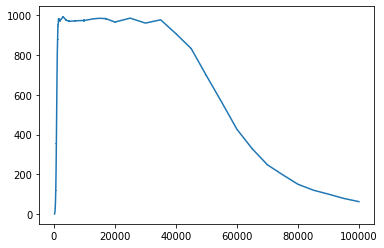

In [83]:
plt.errorbar(f, gain, yerr= gain_error, fmt = '-')

In [147]:
from scipy.integrate import trapz
resistances = np.array([477.1e3, 810e3, 99.7e3, 502.3e3, 10.03e3]) 
resistance_uncertainty = np.array([0.2e3, 2e3, 0.2e3, 0.3e3, 0.3e3])

cap = 125e-12
dcap = 14e-12

def mc_compute(freq, gain, gain_error, r, rerr, cap, cap_err, n_samp):
    samples = []
    for k in range(n_samp):
        mc_gain = gain + np.random.normal(len(gain))*gain_error
        mc_r = r + rerr*np.random.normal(1)
        mc_cap = cap + cap_err*np.random.normal(1)
        mc_integrand = mc_gain**2.0/(1+ (2*np.pi*mc_r*mc_cap*freq)**2.0)
        mc_int = scipy.integrate.trapz(mc_integrand, freq)
        samples.append(mc_r*mc_int)
    return np.array(samples)
        

In [148]:
samples = mc_compute(f, gain, gain_error, resistances[0], resistance_uncertainty[0], cap, dcap,100000)
p, x = p_histogram(samples, bins = 50)


In [149]:
v2rmsd4t = np.array([2.57337556e-08, 1.96214066e-08, 2.21758082e-08, 2.38320749e-08,
       7.31633110e-09])
v2rmsd4t_unc = np.array([1.25267830e-09, 1.46644504e-09, 1.08426579e-09, 1.77538860e-09,
       2.07583938e-10])

In [150]:
rgr = []
rgr_unc = []
for k in range(5):
    samples = mc_compute(f, gain, gain_error, resistances[k], resistance_uncertainty[k], cap, dcap,10000)
    rgr.append(np.mean(samples))
    rgr_unc.append(np.std(samples))
rgr = np.array(rgr)  
rgr_unc = np.array(rgr_unc)

<ErrorbarContainer object of 3 artists>

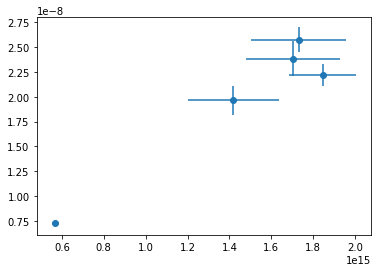

In [151]:
plt.errorbar(rgr, v2rmsd4t, yerr = v2rmsd4t_unc, xerr= rgr_unc, fmt = 'o' )

In [152]:
def linear_model(x, k, b):
    return x/k+b

In [153]:
from lmfit.models import Model

[[Model]]
    Model(linear_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 5
    # variables        = 2
    chi-square         = 2.21029433
    reduced chi-square = 0.73676478
    Akaike info crit   = -0.08156113
    Bayesian info crit = -0.86268530
[[Variables]]
    k:  1.36210607 +/- 0.10464250 (7.68%) (init = 1)
    b:  0.03161668 +/- 0.04566189 (144.42%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(k, b) =  0.953


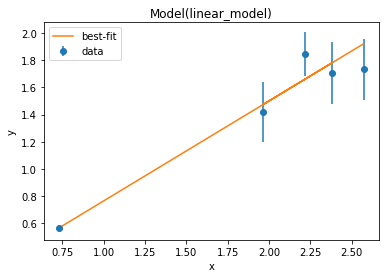

In [154]:
lmod = Model(linear_model)
lmod.set_param_hint(name = 'k', value = 1)
lmod.set_param_hint(name = 'b', value = 1)
result = lmod.fit(1e-15*rgr, x = v2rmsd4t*1e8, weights = 1/(rgr_unc*1e-15))
print(result.fit_report())
result.plot_fit()